# Exploratory Data Analysis - Generation in the USA

In this notebook, the data adapted from https://www.eia.gov/electricity/data.php was used, related to the total generation of the USA States from 2001 to May 2022 by month. The main objective was to **analyze the general trends of data** related to the increment of renewable resources and the overall generation related to the seasons. In this way, this analysis is the base for building future **Machine Learning** models able to identify the evolution of the energetic sector by type of generating resource and the final service provider.

## Inital data remarks

Firstly, the main libraries were imported with the following uses

1. **pandas:** Data loading and transformation
2. **matplotlib:** Plotting alongside seaborn
3. **seaborn:** Plotting tool, especially used for boxplots and additional analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
pd.set_option('mode.chained_assignment', None)

Then with pandas, the data stored in `data/organised_Gen.csv` was saved in the `data` variable and the "Unnamed: 0" column was erased as it doesn't contain useful information for this project.

In [2]:
data=pd.read_csv("data/organised_Gen.csv")
data.drop(columns="Unnamed: 0",inplace=True)

With the `.info()` function the main columns were analysed in search of null content, but in this case, all the 496774 rows have a value:

In [3]:
data.head()

,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
0,2001,1,AK,Total Electric Power Industry,Coal,46903.0
1,2001,1,AK,Total Electric Power Industry,Petroleum,71085.0
2,2001,1,AK,Total Electric Power Industry,Natural Gas,367521.0
3,2001,1,AK,Total Electric Power Industry,Hydroelectric Conventional,104549.0
4,2001,1,AK,Total Electric Power Industry,Wind,87.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496774 entries, 0 to 496773
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YEAR                        496774 non-null  int64  
 1   MONTH                       496774 non-null  int64  
 2   STATE                       496774 non-null  object 
 3   TYPE OF PRODUCER            496774 non-null  object 
 4   ENERGY SOURCE               496774 non-null  object 
 5   GENERATION (Megawatthours)  496774 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 22.7+ MB


This data is structured in 5 columns that have the following data:

1. **Year:** and **Month:** Total generation registered in that time period
3. **State:** 51 USA states alongside and a total country measure
4. **Type of producer:** Companys and utilities that generates energy from final consumption
5. **Generation (Megawatt-hours):** Measure of energy on MWh

In [5]:
data.describe()

,YEAR,MONTH,GENERATION (Megawatthours)
count,496774.000000,496774.000000,4.967740e+05
mean,2011.649768,6.431452,1.393384e+06
std,6.168041,3.458944,1.078685e+07
min,2001.000000,1.000000,-9.978550e+05
25%,2006.000000,3.000000,1.643000e+03
50%,2012.000000,6.000000,2.330103e+04
75%,2017.000000,9.000000,2.792042e+05
max,2022.000000,12.000000,4.217967e+08


With the describe function it was found that the year and month data are in the expected range while in the Generation there are some negative values. To check the possible reasons and overall data structure the categorical column values were printed:

In [6]:
for i in data.columns[:-1]:
    print(i + ": ",  data[i].unique(), "Total Values:", len(data[i].unique()))

YEAR:  [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2021 2022] Total Values: 22
MONTH:  [ 1  2  3  4  5  6  7  8  9 10 11 12] Total Values: 12
STATE:  ['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID'
 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC'
 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY' 'US-TOTAL'] Total Values: 52
TYPE OF PRODUCER:  ['Total Electric Power Industry' 'Electric Generators, Electric Utilities'
 'Combined Heat and Power, Electric Power'
 'Combined Heat and Power, Commercial Power'
 'Combined Heat and Power, Industrial Power'
 'Electric Generators, Independent Power Producers'] Total Values: 6
ENERGY SOURCE:  ['Coal' 'Petroleum' 'Natural Gas' 'Hydroelectric Conventional' 'Wind'
 'Total' 'Other Gases' 'Nuclear' 'Wood and Wood Derived Fuels'
 'Other Biomass' 'Other' 'Solar Thermal and Photovoltaic' '

The month and year columns have the expected data in the same way as the State column, where there are all the state codes and the summary variable `'US-Total'`. Meanwhile, the Type of producer has 6 categories that classify the energy generation and that are going to be used to analyze the effect and importance of each one. Finally, on the energy source column, there are the main generation resources that have from traditional fossil fuel generators to renewable farms. 

For data plotting, the year and month were merged in the "Date" column and were set as the overall data frame index:

In [7]:
#Change of columns to datetime and replacement of labels
data["Date"]=pd.to_datetime(dict(year=data["YEAR"],month=data["MONTH"],day=1))
data=data.set_index("Date")
data.drop(columns=["YEAR","MONTH"],inplace=True)
data

,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
Date,,,,
2001-01-01,AK,Total Electric Power Industry,Coal,46903.0
2001-01-01,AK,Total Electric Power Industry,Petroleum,71085.0
2001-01-01,AK,Total Electric Power Industry,Natural Gas,367521.0
2001-01-01,AK,Total Electric Power Industry,Hydroelectric Conventional,104549.0
2001-01-01,AK,Total Electric Power Industry,Wind,87.0
...,...,...,...,...
2022-05-01,WY,"Electric Generators, Electric Utilities",Coal,2071403.0
2022-05-01,WY,"Electric Generators, Electric Utilities",Hydroelectric Conventional,96790.0
2022-05-01,WY,"Electric Generators, Electric Utilities",Natural Gas,91570.0


## Total Generation trends

With the modified data frame a filter was applied for only considering the total energy generation and to identify the type of producer and energy source trends. It was also filtered the "Total Electric Power Industry" of TYPE OF PRODUCER and "Total" of ENERGY SOURCE for avoiding problems in the future groupby methods calculation

In [8]:
#Testing of plots
total_gen=data[data["STATE"]=="US-TOTAL"]
total_gen=total_gen[(total_gen["TYPE OF PRODUCER"]!="Total Electric Power Industry") & 
                    (total_gen["ENERGY SOURCE"]!="Total") ]

With this main date, it was created the variable `plot1` for storing the data frame that contains the total energy generated for each type of producer for all the months from January 2001 to May 2022.

In [9]:
plot1=total_gen.groupby(by=["Date","TYPE OF PRODUCER"]).sum().reset_index()
plot1

,Date,TYPE OF PRODUCER,GENERATION (Megawatthours)
0,2001-01-01,"Combined Heat and Power, Commercial Power",628822.0
1,2001-01-01,"Combined Heat and Power, Electric Power",14110257.0
2,2001-01-01,"Combined Heat and Power, Industrial Power",13127989.0
3,2001-01-01,"Electric Generators, Electric Utilities",236467267.0
4,2001-01-01,"Electric Generators, Independent Power Producers",68158826.0
...,...,...,...
1280,2022-05-01,"Combined Heat and Power, Commercial Power",1046962.0
1281,2022-05-01,"Combined Heat and Power, Electric Power",9892998.0
1282,2022-05-01,"Combined Heat and Power, Industrial Power",11341483.0
1283,2022-05-01,"Electric Generators, Electric Utilities",178099898.0


Then, for simplifying the data reading a new column was created with the energy measured in TWh ($10^6$ MWh)

In [10]:
plot1["Generation (TWh)"]=plot1["GENERATION (Megawatthours)"]/1000000
plot1["Generation (TWh)"]

0         0.628822
1        14.110257
2        13.127989
3       236.467267
4        68.158826
           ...    
1280      1.046962
1281      9.892998
1282     11.341483
1283    178.099898
1284    143.120850
Name: Generation (TWh), Length: 1285, dtype: float64

With these data, the total energy generated through the timeframe is shown in the next figure

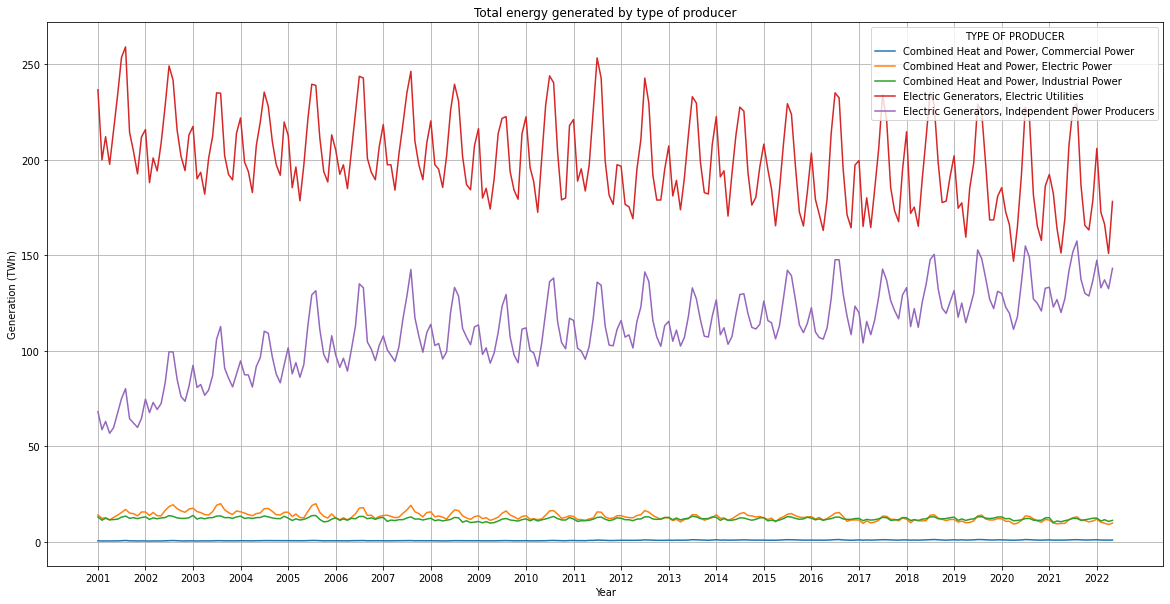

In [11]:
#Figsize
plt.figure(figsize=(20,10))
#Seaborn style
sns.color_palette("tab10")
#Plot - using mdates for correct datetime format
sns.lineplot(data=plot1,
                x="Date",y="Generation (TWh)",hue="TYPE OF PRODUCER").xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#Plot additional properties
plt.grid()
plt.xticks([str(i+2001)+"-01-01" for i in range(22)])
plt.title("Total energy generated by type of producer")
plt.xlabel("Year");

In this figure, it is recognized that **Electric Generators** are the main source of energy compared to the Combined Heat and Power of the other industries. However, The energy obtained from Electric Utilities is in a decreasing trend, the opposite as the *Independent Power Producers* show that there is an evolution of the way the energy is generated as the independent generator are comming closer to the traditional Utilities. At the same time, there is a monthly trend that represents a higher generation in some months of the year. This is related to the **energy needs** that change related to the stations. 

As a complement, in the following figure, the other three producers are shown.

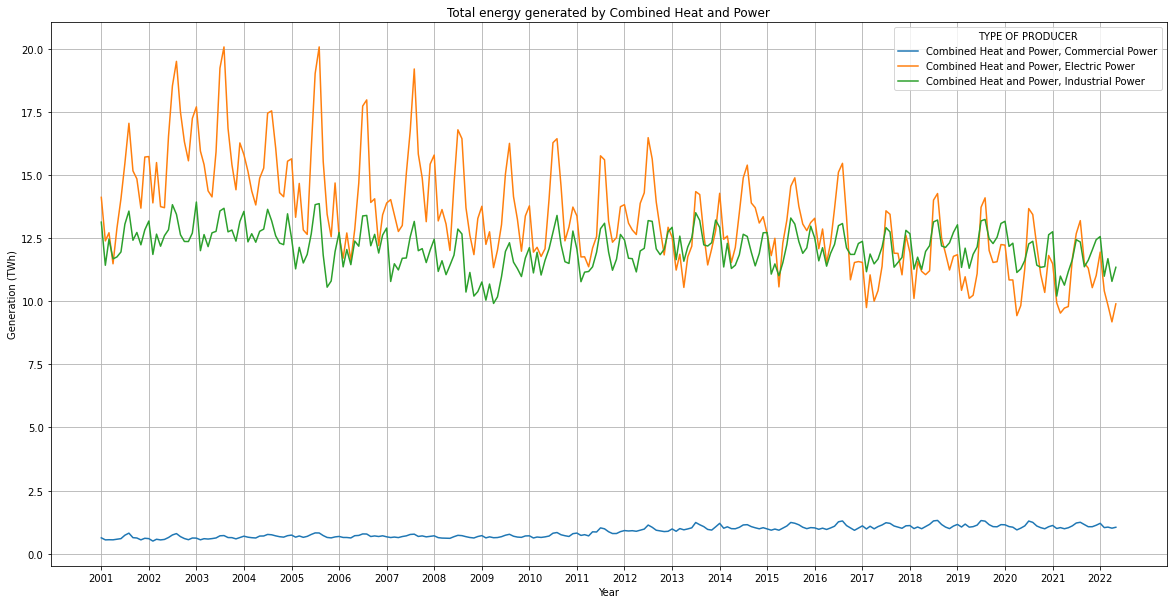

In [12]:
#Other producers
filtering=["Total Electric Power Industry","Electric Generators, Electric Utilities", "Electric Generators, Independent Power Producers"]
#Figsize
plt.figure(figsize=(20,10))
#Seaborn style
sns.color_palette("tab10")
#Plot - using mdates for correct datetime format
sns.lineplot(data=plot1[~plot1["TYPE OF PRODUCER"].isin(filtering)],
                x="Date",y="Generation (TWh)",hue="TYPE OF PRODUCER").xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#Plot additional properties
plt.grid()
plt.xticks([str(i+2001)+"-01-01" for i in range(22)])
plt.title("Total energy generated by Combined Heat and Power")
plt.xlabel("Year");

Electric power and industrial power have almost the same total generation, with a decreasing trend for the latter one. These producers also show a monthly trend, different from the main producers. 

On the other hand, this analysis was repeated but with the generating resources. The data treatment is the same as the group by function, creating the data frame plot2.

In [13]:
plot2=total_gen.groupby(by=["Date","ENERGY SOURCE"]).sum().reset_index()
plot2

,Date,ENERGY SOURCE,GENERATION (Megawatthours)
0,2001-01-01,Coal,177287111.0
1,2001-01-01,Geothermal,1229325.0
2,2001-01-01,Hydroelectric Conventional,18852048.0
3,2001-01-01,Natural Gas,42388663.0
4,2001-01-01,Nuclear,68707077.0
...,...,...,...
3336,2022-05-01,Petroleum,1524489.0
3337,2022-05-01,Pumped Storage,-466746.0
3338,2022-05-01,Solar Thermal and Photovoltaic,15151119.0
3339,2022-05-01,Wind,41891907.0


In [14]:
plot2["Generation (TWh)"]=plot2["GENERATION (Megawatthours)"]/1000000
plot2["Generation (TWh)"]

0       177.287111
1         1.229325
2        18.852048
3        42.388663
4        68.707077
           ...    
3336      1.524489
3337     -0.466746
3338     15.151119
3339     41.891907
3340      3.073482
Name: Generation (TWh), Length: 3341, dtype: float64

With this new data frame, the total energy per source was plotted. However, as there are *13 different energy sources* the main differences between generations are difficult to recognize. For this reason, the analysis was divided into specific categories. At an initial glance, energies such as wind and solar energy increase **exponentially** while others such as Coal started to reduce their overall importance in energy generation.

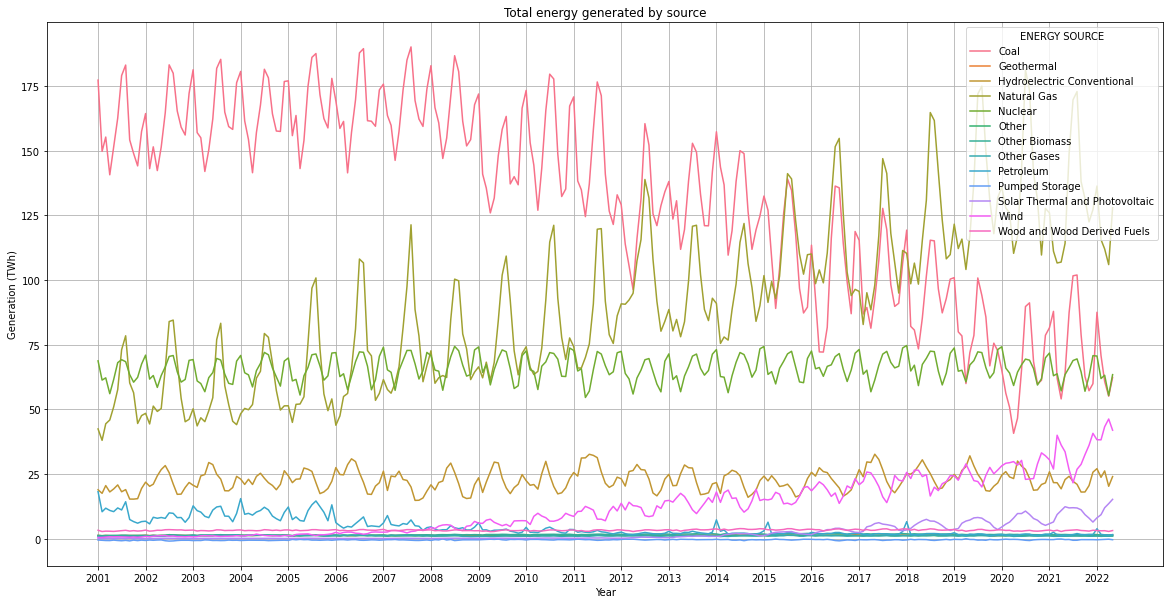

In [15]:
#Figsize
plt.figure(figsize=(20,10))
#Seaborn style
sns.color_palette("tab10")
#Plot - using mdates for correct datetime format
sns.lineplot(data=plot2,
                x="Date",y="Generation (TWh)",hue="ENERGY SOURCE").xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#Plot additional properties
plt.grid()
plt.xticks([str(i+2001)+"-01-01" for i in range(22)])
plt.title("Total energy generated by source")
plt.xlabel("Year");

Firstly, it was checked the total energy per source, where Coal is the most used and with the category of "Other Gases" the least used. However, there is the category of pumped storage that is negative, happening as this behavior is similar to a battery, requiring energy for loading and to be used afterward.

In [16]:
significant=plot2.groupby(by="ENERGY SOURCE").sum()["Generation (TWh)"].reset_index()
total_generation=significant.sort_values("Generation (TWh)",ascending=False)
total_generation

,ENERGY SOURCE,Generation (TWh)
0,Coal,33732.520514
3,Natural Gas,23302.291894
4,Nuclear,16941.041304
2,Hydroelectric Conventional,5808.074351
11,Wind,3120.791677
8,Petroleum,1108.598171
12,Wood and Wood Derived Fuels,826.754395
10,Solar Thermal and Photovoltaic,551.950863
6,Other Biomass,393.971701
1,Geothermal,327.687308


To see the source behavior the analysis was divided into groups, beginning with the conventional power sources of Coal, Natural Gas, Nuclear, and Petroleum as presented in the following plot.

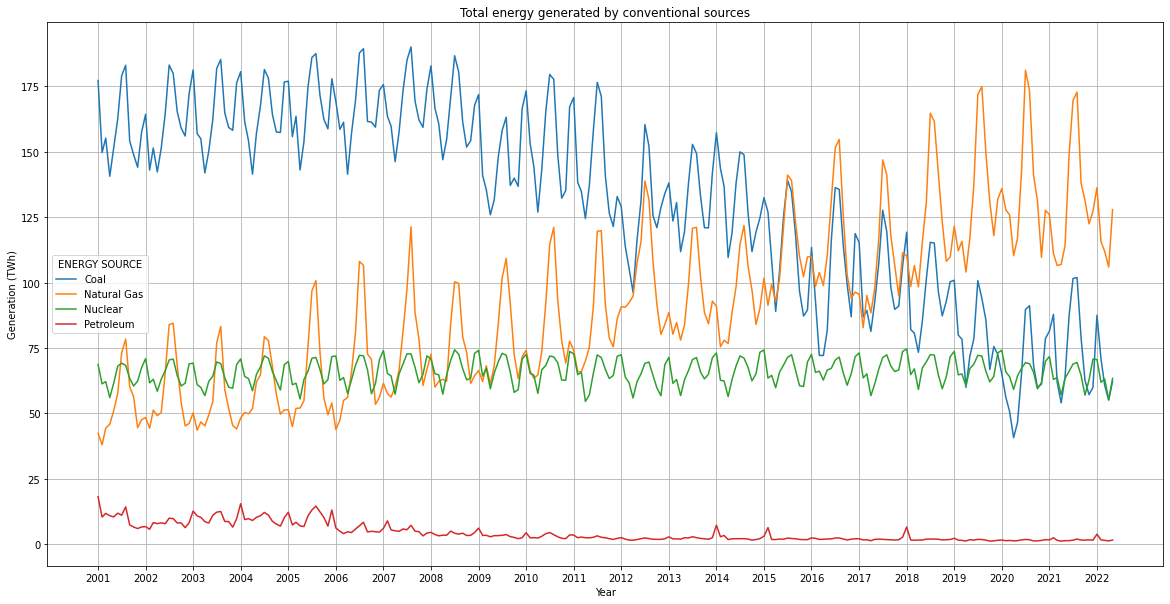

In [17]:
conventional=["Coal","Natural Gas","Nuclear","Petroleum"]
#Figsize
plt.figure(figsize=(20,10))
#Seaborn style
sns.color_palette("tab10")
#Plot - using mdates for correct datetime format
sns.lineplot(data=plot2[plot2["ENERGY SOURCE"].isin(conventional)],
                x="Date",y="Generation (TWh)",hue="ENERGY SOURCE").xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#Plot additional properties
plt.grid()
plt.xticks([str(i+2001)+"-01-01" for i in range(22)])
plt.title("Total energy generated by conventional sources")
plt.xlabel("Year");

The plot shows that the use of Petroleum and Coal for producing energy has been decreasing, in the case of **Coal** from 2009. In the same way, **Natural Gas** has been increasing through the years as a way of replacement and as it is a cleaner way of generating energy. Finally, the **Nuclear generating units** keep almost the same energy values in the period analysis.

In complement, the renewable energies were plotted on the following figure:

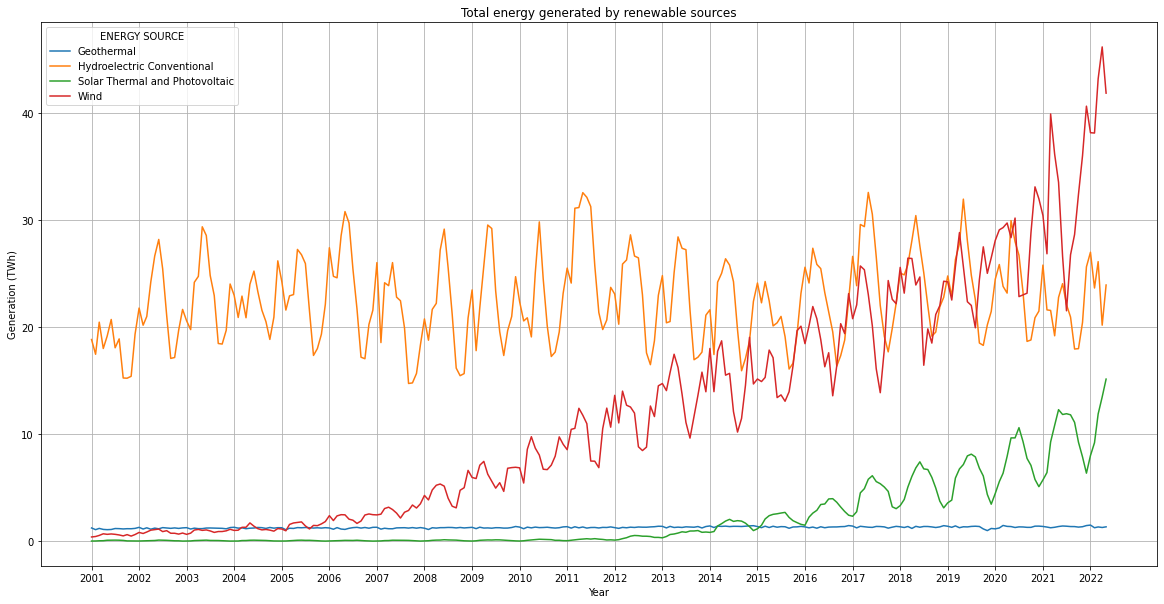

In [18]:
renewable=["Hydroelectric Conventional","Solar Thermal and Photovoltaic", "Wind","Geothermal"]
#Figsize
plt.figure(figsize=(20,10))
#Seaborn style
sns.color_palette("tab10")
#Plot - using mdates for correct datetime format
sns.lineplot(data=plot2[plot2["ENERGY SOURCE"].isin(renewable)],
                x="Date",y="Generation (TWh)",hue="ENERGY SOURCE").xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#Plot additional properties
plt.grid()
plt.xticks([str(i+2001)+"-01-01" for i in range(22)])
plt.title("Total energy generated by renewable sources")
plt.xlabel("Year");

Differently from the previous figure, **Wind and solar energy** increased exponentially through the years, coming closer to the energy generated by the traditional resources. However, in the case of **Geothermal** and **Hydroelectrical**, the energy stays in the same range. In parallel, wind and solar have different monthly trends than the rest of the cases as their energy output depends on the climate conditions.

Then, the **Pumped Storage** in the next figure doesn't show any trend and also there are no positive values, meaning that in total this functions as a battery that is always consuming energy rather than using it to supply the customer requirements.

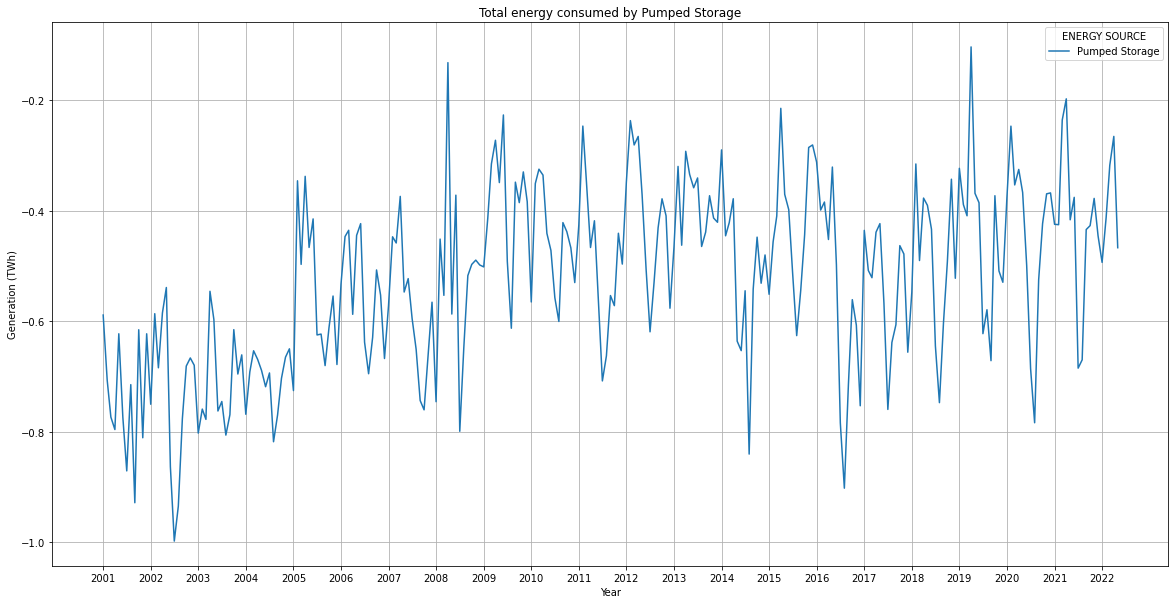

In [19]:
storage=["Pumped Storage"]
#Figsize
plt.figure(figsize=(20,10))
#Seaborn style
sns.color_palette("tab10")
#Plot - using mdates for correct datetime format
sns.lineplot(data=plot2[plot2["ENERGY SOURCE"].isin(storage)],
                x="Date",y="Generation (TWh)",hue="ENERGY SOURCE").xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#Plot additional properties
plt.grid()
plt.xticks([str(i+2001)+"-01-01" for i in range(22)])
plt.title("Total energy consumed by Pumped Storage")
plt.xlabel("Year");

In the end, the remaining sources don't show a special trend as they remain in a specific range and they are the least used for generating energy.

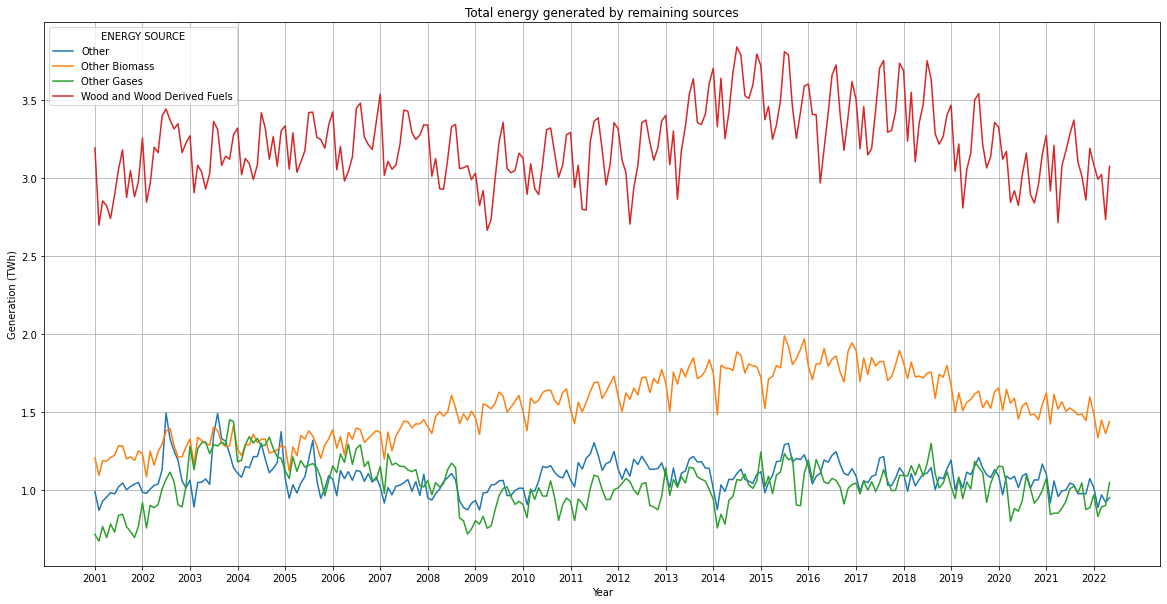

In [20]:
current_energies=conventional+renewable+storage+["Total"]
#Figsize
plt.figure(figsize=(20,10))
#Seaborn style
sns.color_palette("tab10")
#Plot - using mdates for correct datetime format
sns.lineplot(data=plot2[~plot2["ENERGY SOURCE"].isin(current_energies)],
                x="Date",y="Generation (TWh)",hue="ENERGY SOURCE").xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#Plot additional properties
plt.grid()
plt.xticks([str(i+2001)+"-01-01" for i in range(22)])
plt.title("Total energy generated by remaining sources")
plt.xlabel("Year");

# Evolution of generation by month

As an additional way to analyze the monthly trends, there were used boxplots from seaborn, beginning with the overall generation classified per month of all the 22 years, obtaining the following graph.

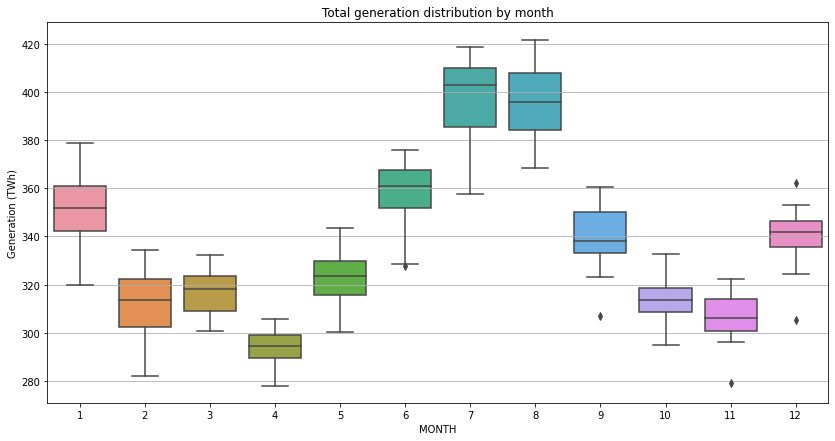

In [21]:
#Data filtering
total_dist=data[(data["STATE"]=="US-TOTAL") & (data["ENERGY SOURCE"]=="Total") &
                (data["TYPE OF PRODUCER"]=="Total Electric Power Industry")]
#Creating a column with the month data
total_dist["MONTH"]=total_dist.index.month
#Energy convertion
total_dist["Generation (TWh)"]= total_dist["GENERATION (Megawatthours)"]/1000000
#Plotting
plt.figure(figsize=(14,7))
plt.grid()
#Boxplot
sns.boxplot(data=total_dist,x="MONTH",y="Generation (TWh)")
plt.title("Total generation distribution by month");

In this figure, it was recognized that the month with the highest generation corresponds to **July and August**, something that could be related to the summer station. On the other side, the lowest generation is registered in **April and November**.

Overall, the total generation almost follows a normal distribution, except for some outliers in September, November, and December. In complement, this monthly behavior was plotted considering renewable resources to see the specific distribution through time.

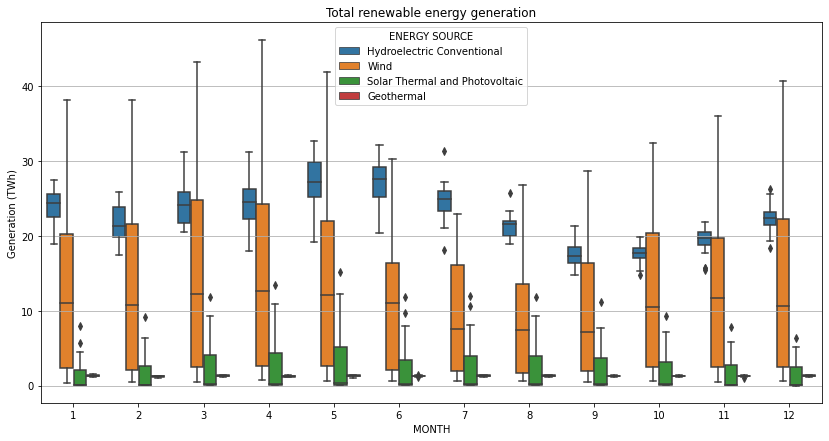

In [22]:
#Data filtering
total_dist=data[(data["STATE"]=="US-TOTAL") & (data["ENERGY SOURCE"].isin(renewable)) &
                (data["TYPE OF PRODUCER"]=="Total Electric Power Industry")]
#Creating a column with the month data
total_dist["MONTH"]=total_dist.index.month
#Energy convertion
total_dist["Generation (TWh)"]= total_dist["GENERATION (Megawatthours)"]/1000000
#Plotting
plt.figure(figsize=(14,7))
plt.grid()
#Boxplot
sns.boxplot(data=total_dist,x="MONTH",y="Generation (TWh)",hue="ENERGY SOURCE")
plt.title("Total renewable energy generation");

In this case, the energy generation follows a different trend as there is no special date when this value is increased as in previous plots these energies depend on the climate conditions. Specifically, **wind energy** shows a high dispersion while **geothermal** and **Hydroelectrical** have the opposite. On the other hand, the mean of the solar generation is almost zero as in the initial years of analysis this resource was not used.

To contrast this, the same boxplot was plotted with the conventional units:

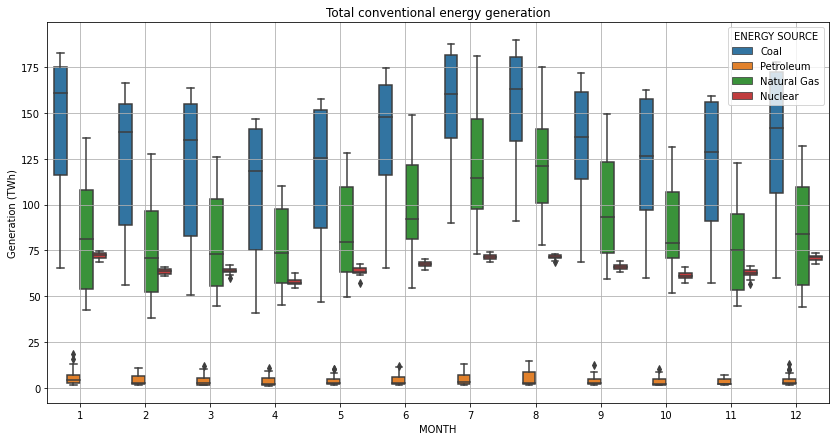

In [23]:
#Data filtering
total_dist=data[(data["STATE"]=="US-TOTAL") & (data["ENERGY SOURCE"].isin(conventional)) & (data["TYPE OF PRODUCER"]=="Total Electric Power Industry")]
#Creating a column with the month data
total_dist["MONTH"]=total_dist.index.month
#Energy convertion
total_dist["Generation (TWh)"]= total_dist["GENERATION (Megawatthours)"]/1000000
#Plotting
plt.figure(figsize=(14,7))
#Boxplot
sns.boxplot(data=total_dist,x="MONTH",y="Generation (TWh)",hue="ENERGY SOURCE")
plt.grid()
plt.title("Total conventional energy generation");

These energies follow the same trend through the months, with a difference mainly in the monthly distributions as the nuclear and petroleum remains almost constant while the other two have some dispersion related to the grid changes presented in previous figures.

To complement the previous analysis, it was made a review of the Energy Generation by state.

## Total energy by state

Initially, a new data frame was built to eliminate the "Total" elements from the columns `"TYPE OF PRODUCER"`, `"ENERGY SOURCE"` and `"STATE"` for avoiding problems with the filtering.

In [24]:
#Copy without US-TOTAL of previous section
states=data[data["STATE"]!="US-TOTAL"].copy()
#TWh data
states["Generation (TWh)"]=states["GENERATION (Megawatthours)"]/1000000
states

,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours),Generation (TWh)
Date,,,,,
2001-01-01,AK,Total Electric Power Industry,Coal,46903.0,0.046903
2001-01-01,AK,Total Electric Power Industry,Petroleum,71085.0,0.071085
2001-01-01,AK,Total Electric Power Industry,Natural Gas,367521.0,0.367521
2001-01-01,AK,Total Electric Power Industry,Hydroelectric Conventional,104549.0,0.104549
2001-01-01,AK,Total Electric Power Industry,Wind,87.0,0.000087
...,...,...,...,...,...
2022-05-01,WY,"Electric Generators, Electric Utilities",Coal,2071403.0,2.071403
2022-05-01,WY,"Electric Generators, Electric Utilities",Hydroelectric Conventional,96790.0,0.096790
2022-05-01,WY,"Electric Generators, Electric Utilities",Natural Gas,91570.0,0.091570


However, to improve the data readability, an additional csv located in the data folder was used to show the full state names:

In [25]:
#New dataframe
real_names=pd.read_csv("data/states.csv")
real_names.head()

,State,Abbrev,Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


This was accomplished by the use of the pandas function `merge`

In [26]:
final_states=pd.merge(states,real_names, left_on="STATE", right_on="Code")
#Dropping non useful columns
final_states.drop(columns=["STATE","Abbrev","Code"],inplace=True)
final_states

,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours),Generation (TWh),State
0,Total Electric Power Industry,Coal,46903.0,0.046903,Alaska
1,Total Electric Power Industry,Petroleum,71085.0,0.071085,Alaska
2,Total Electric Power Industry,Natural Gas,367521.0,0.367521,Alaska
3,Total Electric Power Industry,Hydroelectric Conventional,104549.0,0.104549,Alaska
4,Total Electric Power Industry,Wind,87.0,0.000087,Alaska
...,...,...,...,...,...
478447,"Electric Generators, Electric Utilities",Coal,2071403.0,2.071403,Wyoming
478448,"Electric Generators, Electric Utilities",Hydroelectric Conventional,96790.0,0.096790,Wyoming
478449,"Electric Generators, Electric Utilities",Natural Gas,91570.0,0.091570,Wyoming
478450,"Electric Generators, Electric Utilities",Petroleum,1812.0,0.001812,Wyoming


In [27]:
#Elimination of remaining Total variables
fixed_df=final_states[(final_states["TYPE OF PRODUCER"]!="Total Electric Power Industry") & (final_states["ENERGY SOURCE"]!="Total")]
fixed_df

,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours),Generation (TWh),State
6,"Electric Generators, Electric Utilities",Coal,18410.0,0.018410,Alaska
7,"Electric Generators, Electric Utilities",Petroleum,64883.0,0.064883,Alaska
8,"Electric Generators, Electric Utilities",Natural Gas,305277.0,0.305277,Alaska
9,"Electric Generators, Electric Utilities",Hydroelectric Conventional,104549.0,0.104549,Alaska
10,"Electric Generators, Electric Utilities",Wind,87.0,0.000087,Alaska
...,...,...,...,...,...
478447,"Electric Generators, Electric Utilities",Coal,2071403.0,2.071403,Wyoming
478448,"Electric Generators, Electric Utilities",Hydroelectric Conventional,96790.0,0.096790,Wyoming
478449,"Electric Generators, Electric Utilities",Natural Gas,91570.0,0.091570,Wyoming
478450,"Electric Generators, Electric Utilities",Petroleum,1812.0,0.001812,Wyoming


With this transformation, the states with the most total generation were saved on a variable for future analysis

In [28]:
states_energy=fixed_df.groupby(by="State").sum()["Generation (TWh)"].reset_index()
most_gen=states_energy.sort_values("Generation (TWh)", ascending=False).head(10)
most_gen

,State,Generation (TWh)
43,Texas,9156.938595
9,Florida,4854.789669
38,Pennsylvania,4714.386066
4,California,4274.580556
13,Illinois,4102.773434
0,Alabama,3068.318686
35,Ohio,2927.476647
32,New York,2919.600143
10,Georgia,2756.449309
33,North Carolina,2704.614933


Texas state is the one with the most generation, being almost as twice as the second one. In contrast, there were found the states with the least energy generation.

In [29]:
least_gen=states_energy.sort_values("Generation (TWh)", ascending=True).head(10)
least_gen

,State,Generation (TWh)
8,District of Columbia,2.541825
45,Vermont,104.769482
1,Alaska,139.150769
7,Delaware,146.766774
39,Rhode Island,153.469706
41,South Dakota,220.984023
11,Hawaii,225.366290
12,Idaho,302.897330
19,Maine,322.446982
29,New Hampshire,423.770563


The District of Columbia is the one with the least generation, corresponding to the U.S. capital, implying that the used energy is generated from other states.

Finally, an analysis of resources by the state was made.

## Distribution of resources by state

Initially, there were built specific data frames containing the information of producer and source.

In [30]:
# Producer base dataframe
producer=fixed_df.groupby(by=["TYPE OF PRODUCER","State"]).sum()["Generation (TWh)"].reset_index()
producer

,TYPE OF PRODUCER,State,Generation (TWh)
0,"Combined Heat and Power, Commercial Power",Alaska,5.505226
1,"Combined Heat and Power, Commercial Power",Arizona,2.188844
2,"Combined Heat and Power, Commercial Power",Arkansas,0.417473
3,"Combined Heat and Power, Commercial Power",California,51.956816
4,"Combined Heat and Power, Commercial Power",Colorado,1.085597
...,...,...,...
240,"Electric Generators, Independent Power Producers",Virginia,215.877049
241,"Electric Generators, Independent Power Producers",Washington,264.538750
242,"Electric Generators, Independent Power Producers",West Virginia,472.265312
243,"Electric Generators, Independent Power Producers",Wisconsin,225.367114


In [31]:
#Other representation
producer_totals=producer.pivot_table(index=["State"],values=["Generation (TWh)"], columns="TYPE OF PRODUCER")
producer_totals.head(10)

Generation (TWh)  \
TYPE OF PRODUCER     Combined Heat and Power, Commercial Power   
State                                                            
Alabama                                                    NaN   
Alaska                                                5.505226   
Arizona                                               2.188844   
Arkansas                                              0.417473   
California                                           51.956816   
Colorado                                              1.085597   
Connecticut                                           4.657428   
Delaware                                              0.062691   
District of Columbia                                  1.001588   
Florida                                               1.884098   

                                                              \
TYPE OF PRODUCER     Combined Heat and Power, Electric Power   
State                                                          
Alabama                                            76.133598   
Alaska                                              4.178885   
Arizona                                            12.459990   
Arkansas                                           26.599230   
California                                        407.640474   
Colorado                                           21.367291   
Connecticut                                        22.056192   
Delaware                                            8.015790   
District of Columbia                                0.083796   
Florida                                           127.359503   

                                                                \
TYPE OF PRODUCER     Combined Heat and Power, Industrial Power   
State                                                            
Alabama                                              99.917797   
Alaska                                                4.454818   
Arizona                                               3.952099   
Arkansas                                             38.841792   
California                                          329.774061   
Colorado                                              1.958973   
Connecticut                                           8.704093   
Delaware                                             18.215082   
District of Columbia                                       NaN   
Florida                                             110.098029   

                                                              \
TYPE OF PRODUCER     Electric Generators, Electric Utilities   
State                                                          
Alabama                                          2457.292564   
Alaska                                            124.408173   
Arizona                                          1912.275219   
Arkansas                                         1003.123649   
California                                       1734.660643   
Colorado                                          884.845942   
Connecticut                                         4.116779   
Delaware                                            2.647869   
District of Columbia                                0.071199   
Florida                                          4408.864738   

                                                                       
TYPE OF PRODUCER     Electric Generators, Independent Power Producers  
State                                                                  
Alabama                                                    434.974727  
Alaska                                                       0.603666  
Arizona                                                    368.402963  
Arkansas                                                   154.431203  
California                                                1750.548561  
Colorado                                                   203.509081  
Connecticut   

As with the pivot table representation of the data, it is recognized that not all the states have their energy generated by all the Types of producers. This is the same for the source data

In [32]:
# Main source data
source=fixed_df.groupby(by=["ENERGY SOURCE","State"]).sum()["Generation (TWh)"].reset_index()
source

,ENERGY SOURCE,State,Generation (TWh)
0,Coal,Alabama,1144.623786
1,Coal,Alaska,13.575793
2,Coal,Arizona,759.333144
3,Coal,Arkansas,542.084089
4,Coal,California,29.303358
...,...,...,...
524,Wood and Wood Derived Fuels,Vermont,8.808988
525,Wood and Wood Derived Fuels,Virginia,44.182385
526,Wood and Wood Derived Fuels,Washington,29.883852
527,Wood and Wood Derived Fuels,West Virginia,0.001573


In [33]:
#Other representation
source_totals=source.pivot_table(index=["State"],values=["Generation (TWh)"], columns="ENERGY SOURCE")
source_totals.head()

Generation (TWh)                                         \
ENERGY SOURCE             Coal  Geothermal Hydroelectric Conventional   
State                                                                   
Alabama            1144.623786         NaN                 208.274456   
Alaska               13.575793         NaN                  32.033606   
Arizona             759.333144         NaN                 145.628121   
Arkansas            542.084089         NaN                  70.929724   
California           29.303358  263.547287                 630.022072   

                                                                             \
ENERGY SOURCE  Natural Gas     Nuclear      Other Other Biomass Other Gases   
State                                                                         
Alabama         816.255568  817.414918   1.594963      0.537103    2.707127   
Alaska           72.484175         NaN   0.004865      0.492652    0.005397   
Arizona         685.844548  647.189983   2.830349      0.853550         NaN   
Arkansas        266.161812  305.966021   0.589540      1.456999         NaN   
California     2190.498096  553.445456  13.545220     53.803659   33.971566   

                                                                        \
ENERGY SOURCE  Petroleum Pumped Storage Solar Thermal and Photovoltaic   
State                                                                    
Alabama         3.387559            NaN                       2.193804   
Alaska         19.088571            NaN                       0.000634   
Arizona         1.368640       1.951245                      44.396703   
Arkansas        3.039312       0.788922                       1.494592   
California     23.183338      -1.382483                     215.180003   

                                                       
ENERGY SOURCE        Wind Wood and Wood Derived Fuels  
State                                                  
Alabama               NaN                   71.329402  
Alaska           1.461977                    0.003099  
Arizona          7.549967                    2.332865  
Arkansas              NaN                   30.902336  
California     194.721806                   74.741178

In this case, there are energy sources such as Geothermal that are not used in all the states.

However, for being able to plot the respective results it was made a column name change for eliminating the multi-indexing obtained in previous steps:

In [34]:
producer_totals.columns

MultiIndex([('Generation (TWh)', ...),
            ('Generation (TWh)', ...),
            ('Generation (TWh)', ...),
            ('Generation (TWh)', ...),
            ('Generation (TWh)', ...)],
           names=[None, 'TYPE OF PRODUCER'])

In [35]:
#Name changes by extracting intended name
name_cols_prod=[]
for i in producer_totals.columns:
    name_cols_prod.append(i[1])
name_cols_prod

['Combined Heat and Power, Commercial Power',
 'Combined Heat and Power, Electric Power',
 'Combined Heat and Power, Industrial Power',
 'Electric Generators, Electric Utilities',
 'Electric Generators, Independent Power Producers']

In [36]:
#Handle MultiIndex
source_totals.columns

MultiIndex([('Generation (TWh)',                           'Coal'),
            ('Generation (TWh)',                     'Geothermal'),
            ('Generation (TWh)',     'Hydroelectric Conventional'),
            ('Generation (TWh)',                    'Natural Gas'),
            ('Generation (TWh)',                        'Nuclear'),
            ('Generation (TWh)',                          'Other'),
            ('Generation (TWh)',                  'Other Biomass'),
            ('Generation (TWh)',                    'Other Gases'),
            ('Generation (TWh)',                      'Petroleum'),
            ('Generation (TWh)',                 'Pumped Storage'),
            ('Generation (TWh)', 'Solar Thermal and Photovoltaic'),
            ('Generation (TWh)',                           'Wind'),
            ('Generation (TWh)',    'Wood and Wood Derived Fuels')],
           names=[None, 'ENERGY SOURCE'])

In [37]:
#Name changes by extracting intended name
name_cols=[]
for i in source_totals.columns:
    name_cols.append(i[1])
name_cols

['Coal',
 'Geothermal',
 'Hydroelectric Conventional',
 'Natural Gas',
 'Nuclear',
 'Other',
 'Other Biomass',
 'Other Gases',
 'Petroleum',
 'Pumped Storage',
 'Solar Thermal and Photovoltaic',
 'Wind',
 'Wood and Wood Derived Fuels']

In [38]:
#Final Name change
producer_totals.columns=name_cols_prod
source_totals.columns=name_cols

In [39]:
source_totals.reset_index().head()

,State,Coal,Geothermal,Hydroelectric Conventional,Natural Gas,Nuclear,Other,Other Biomass,Other Gases,Petroleum,Pumped Storage,Solar Thermal and Photovoltaic,Wind,Wood and Wood Derived Fuels
0,Alabama,1144.623786,NaN,208.274456,816.255568,817.414918,1.594963,0.537103,2.707127,3.387559,NaN,2.193804,NaN,71.329402
1,Alaska,13.575793,NaN,32.033606,72.484175,NaN,0.004865,0.492652,0.005397,19.088571,NaN,0.000634,1.461977,0.003099
2,Arizona,759.333144,NaN,145.628121,685.844548,647.189983,2.830349,0.853550,NaN,1.368640,1.951245,44.396703,7.549967,2.332865
3,Arkansas,542.084089,NaN,70.929724,266.161812,305.966021,0.589540,1.456999,NaN,3.039312,0.788922,1.494592,NaN,30.902336
4,California,29.303358,263.547287,630.022072,2190.498096,553.445456,13.545220,53.803659,33.971566,23.183338,-1.382483,215.180003,194.721806,74.741178


In [40]:
producer_totals.reset_index().head()

,State,"Combined Heat and Power, Commercial Power","Combined Heat and Power, Electric Power","Combined Heat and Power, Industrial Power","Electric Generators, Electric Utilities","Electric Generators, Independent Power Producers"
0,Alabama,NaN,76.133598,99.917797,2457.292564,434.974727
1,Alaska,5.505226,4.178885,4.454818,124.408173,0.603666
2,Arizona,2.188844,12.459990,3.952099,1912.275219,368.402963
3,Arkansas,0.417473,26.599230,38.841792,1003.123649,154.431203
4,California,51.956816,407.640474,329.774061,1734.660643,1750.548561


## Barplots and resource remarks

Firstly, it was checked the NaN values from the source to check the usage per state. As presented on the next list, geothermal is the least used source followed by pumped storage. This happens because of the landscape limits:

In [41]:
#Count NaN per category and producer
source_totals.isna().sum().sort_values(ascending=False)

Geothermal                        43
Pumped Storage                    33
Nuclear                           20
Other Gases                       11
Wind                               9
Wood and Wood Derived Fuels        9
Hydroelectric Conventional         3
Coal                               2
Solar Thermal and Photovoltaic     2
Other                              1
Other Biomass                      1
Natural Gas                        0
Petroleum                          0
dtype: int64

On the other side, all the states have energy generated by Electric Generators while in fewer states there are no Combined Heat and Power producers.

In [42]:
producer_totals.isna().sum().sort_values(ascending=False)

Combined Heat and Power, Electric Power             5
Combined Heat and Power, Commercial Power           4
Combined Heat and Power, Industrial Power           1
Electric Generators, Electric Utilities             0
Electric Generators, Independent Power Producers    0
dtype: int64

With this in consideration, the following figure presents the distribution of conventional energy in the states with the most overall generation.

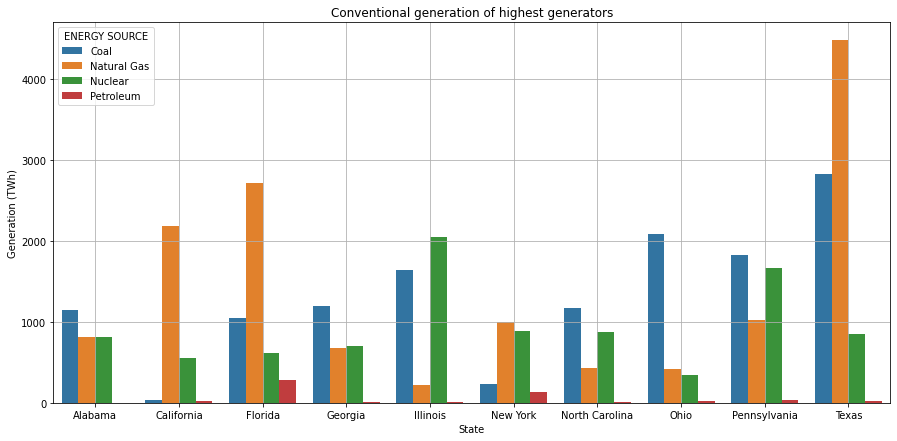

In [43]:
#Initial filtering
filter_source_tot=source[source["State"].isin(most_gen["State"])]
filter_source_tot=filter_source_tot[filter_source_tot["ENERGY SOURCE"].isin(conventional)]
#Plot
plt.figure(figsize=(15,7))
#Seaborn barplot
sns.barplot(x=filter_source_tot["State"], y=filter_source_tot["Generation (TWh)"],hue=filter_source_tot["ENERGY SOURCE"])
plt.grid()
plt.title("Conventional generation of highest generators");

**Texas'** highest generation resource corresponds to Natural Gas, the same as **California** and **Florida** followed by Coal and Nuclear energy. However, each state has its specific trend, being the case of **Ohio** where Coal was the highest used resource. This behavior repeats in the states with the least generation on the next barplot.

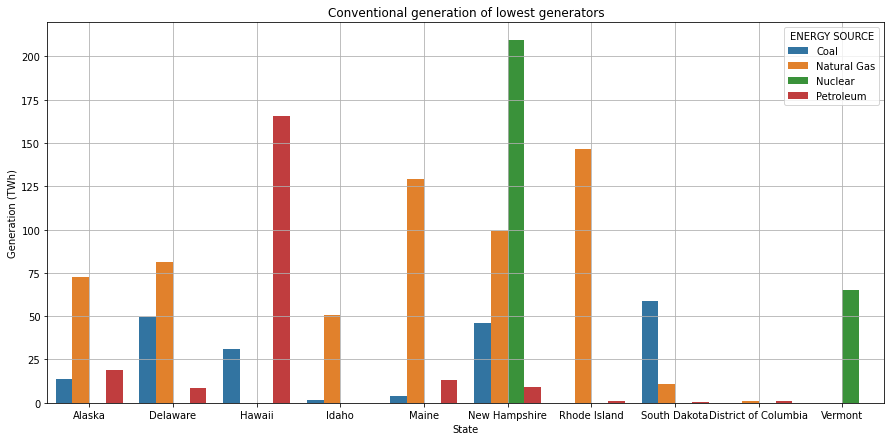

In [44]:
#Initial filtering
filter_source_tot=source[source["State"].isin(least_gen["State"])]
filter_source_tot=filter_source_tot[filter_source_tot["ENERGY SOURCE"].isin(conventional)]
#Plot
plt.figure(figsize=(15,7))
#Seaborn barplot
sns.barplot(x=filter_source_tot["State"], y=filter_source_tot["Generation (TWh)"],hue=filter_source_tot["ENERGY SOURCE"])
plt.grid()
plt.title("Conventional generation of lowest generators");

For example, in **Hawaii** Petroleum is the most used source for generating energy as its location separated from the continent. Also, in the States of **Vermont** and **New Hampshire**, nuclear power is the most used. 

For the renewable resources, this behavior is repeated as presented in the following graph, where in states such as **California** and **New York** the Hydroelectric Conventional plants are used for generating energy while in **Texas** Wind is the most representative, being close to the generation obtained from nuclear power

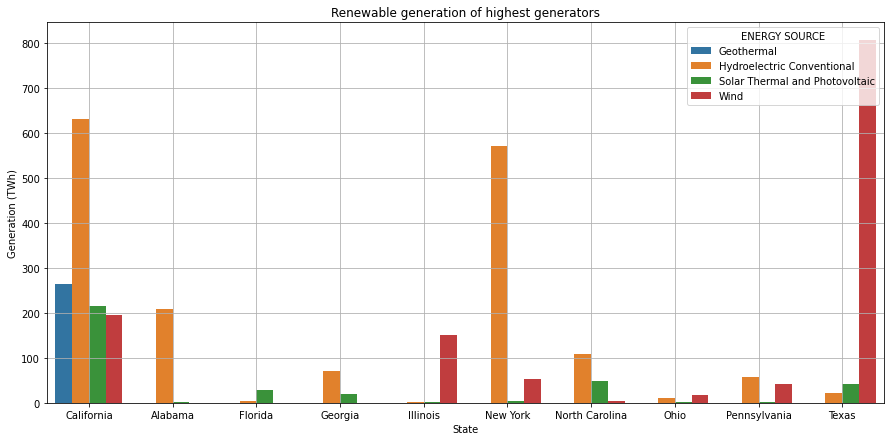

In [45]:
#Initial filtering
filter_source_tot=source[source["State"].isin(most_gen["State"])]
filter_source_tot=filter_source_tot[filter_source_tot["ENERGY SOURCE"].isin(renewable)]
#Plot
plt.figure(figsize=(15,7))
#Seaborn barplot
sns.barplot(x=filter_source_tot["State"], y=filter_source_tot["Generation (TWh)"],hue=filter_source_tot["ENERGY SOURCE"])
plt.grid()
plt.title("Renewable generation of highest generators");

With the lowest generators, it was identified that the main sources of almost all the states correspond to Hydroelectric and Wind, in lower quantities as the previous case.

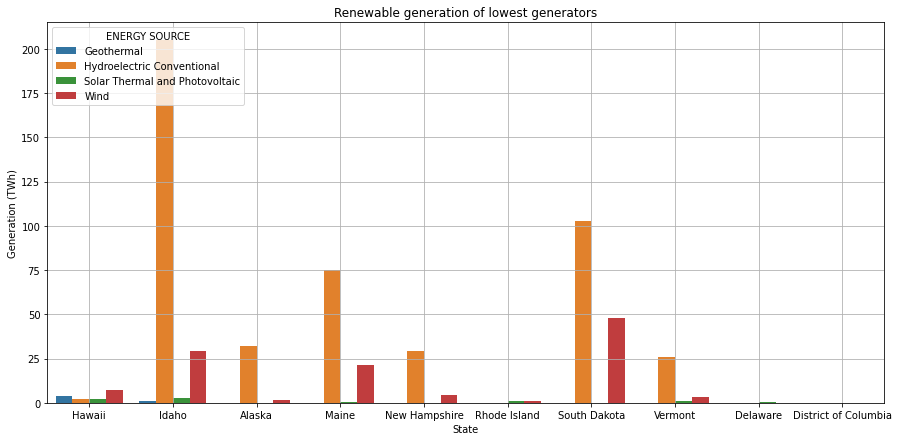

In [46]:
#Initial filtering
filter_source_tot=source[source["State"].isin(least_gen["State"])]
filter_source_tot=filter_source_tot[filter_source_tot["ENERGY SOURCE"].isin(renewable)]
#Plot
plt.figure(figsize=(15,7))
#Seaborn barplot
sns.barplot(x=filter_source_tot["State"], y=filter_source_tot["Generation (TWh)"],hue=filter_source_tot["ENERGY SOURCE"])
plt.grid()
plt.title("Renewable generation of lowest generators");

Then, with the type of producers, the same bar plot was made with the most important states, where it was identified that the **Electric Generators** are responsible for most of the Energy, but with the difference in participation of **Electric Utilities** and **Independent Power Producers**. For example, in Texas, the main producer corresponds to the Independent Power Producers while in Florida is the other type of Electric Generators.

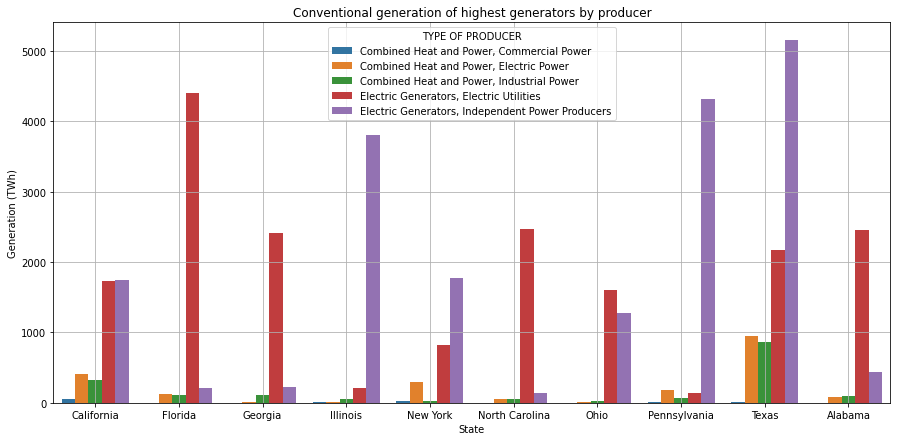

In [47]:
#Initial filtering
filter_producer_tot=producer[producer["State"].isin(most_gen["State"])]
#Plot
plt.figure(figsize=(15,7))
#Seaborn barplot
sns.barplot(x=filter_producer_tot["State"], y=filter_producer_tot["Generation (TWh)"],hue=filter_producer_tot["TYPE OF PRODUCER"])
plt.grid()
plt.title("Conventional generation of highest generators by producer");

With the 10 least generating states the behavior is similar, being the case of **New Hampshire** where the Independent Power Producers generate the most energy while in **Alaska** and **South Dakota** the Electric Utilities are the most relevant. 

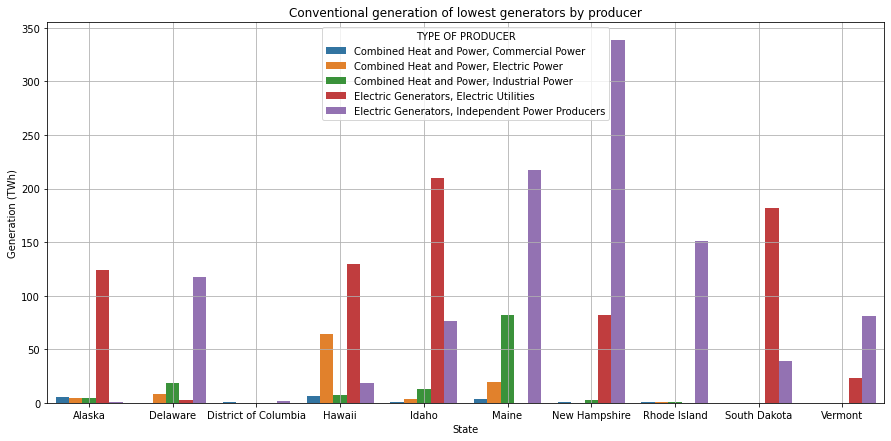

In [48]:
#Initial filtering
filter_producer_tot=producer[producer["State"].isin(least_gen["State"])]
#Plot
plt.figure(figsize=(15,7))
#Seaborn barplot
sns.barplot(x=filter_producer_tot["State"], y=filter_producer_tot["Generation (TWh)"],hue=filter_producer_tot["TYPE OF PRODUCER"])
plt.grid()
plt.title("Conventional generation of lowest generators by producer");

## Most of renewable generators

Finally, in the following figure, there are the states with the most renewable generation, being **Washington** with the most registered energy through the 22 years of data.

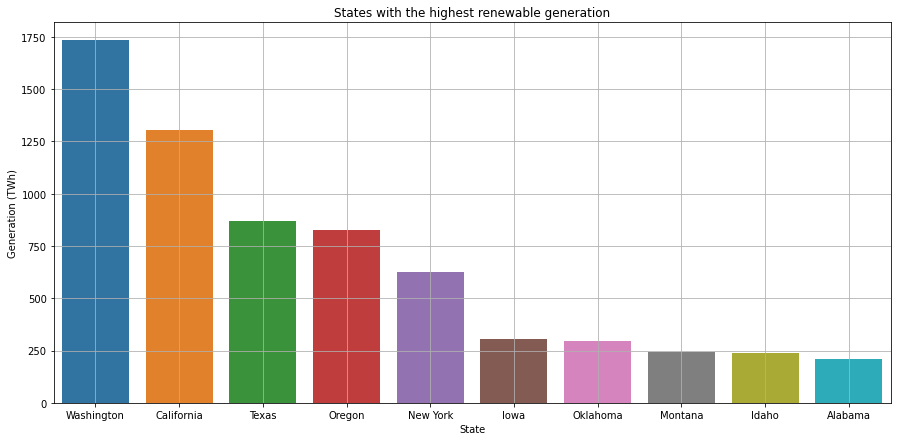

In [49]:
energy_ren=source[source["ENERGY SOURCE"].isin(renewable)]
plot_ren=energy_ren.groupby(by="State").sum().sort_values(by="Generation (TWh)",ascending=False).head(10).reset_index()
plt.figure(figsize=(15,7))
sns.barplot(data=plot_ren,x="State",y="Generation (TWh)")
plt.grid()
plt.title("States with the highest renewable generation");

## Final Remarks

1. With the open data delivered by the [U.S.Energy Information Administration](https://www.eia.gov/) it was possible to analyze the Energy generation trends from monthly differences to the increment of use of renewable resources such as **Solar and Wind Farms.**
2. The Solar and Wind farms generation are increasing **exponentially** while the generation with sources such as **Coal** is reduced. This happens because of the importance of reducing *Global Warming* and the reduced cost of producing renewable energy.
3. Each generation resource has a different monthly behavior, being the conventional plants similar to the total trend while the Renewable Energies depend on the *climate*.
4. There is an increase in **Independent Power Producers Generation** as it is a reduction of the influence of traditional Utilities. However, this is not true for all the States as each one has a different producer distribution.
5. The **Pumped Storage** is a special case of the producers as there were recorded negative values as it functions as a reserve to manage contingencies in the energy supply and the consumption is analyzed in this nomenclature with a negative sign.
6. The lowest generation sources don't have a specific trend as they adapt to the **local needs**, as there are not installed in all the 51 states.
7. With the current data it is possible to make **generation predictions**, identifying a way for future planning, and prepare for possible grid challenges related to the increment of renewable sources.

# References

[1] U.S. Energy Information Administration. https://www.eia.gov/

[2] Electricity: Find statistics on electric power plants, capacity, generation, fuel consumption, sales, prices and customers. https://www.eia.gov/electricity/data.php

[3] OPEN DATA: Committed to making energy data more accessible, understandable, relevant, and responsive to your needs. https://www.eia.gov/opendata/